<a href="https://colab.research.google.com/github/phanducminh201/Data_Analysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TỔNG QUAN VỀ DỮ LIỆU**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px
import statistics
from scipy.stats import sem
import scipy.stats
import datetime as dt
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f_oneway
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('dataset.csv')

**Dữ liệu được lấy từ Kaggle.com của HEEMALI CHAUDHARI** \\
Link dataset: https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   int64  
 8   Units Sold        9648 non-null   int64  
 9   Total Sales       9648 non-null   int64  
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 980.0+ KB


In [ ]:
print(df.describe())

        Retailer ID  Price per Unit   Units Sold   Total Sales  \
count  9.648000e+03     9648.000000  9648.000000   9648.000000   
mean   1.173850e+06       45.216625   256.930037  12455.083955   
std    2.636038e+04       14.705397   214.252030  12716.392111   
min    1.128299e+06        7.000000     0.000000      0.000000   
25%    1.185732e+06       35.000000   106.000000   4065.250000   
50%    1.185732e+06       45.000000   176.000000   7803.500000   
75%    1.185732e+06       55.000000   350.000000  15864.500000   
max    1.197831e+06      110.000000  1275.000000  82500.000000   

       Operating Profit  Operating Margin  
count       9648.000000       9648.000000  
mean        4894.793501          0.422991  
std         4866.464372          0.097197  
min            0.000000          0.100000  
25%         1753.440000          0.350000  
50%         3262.980000          0.410000  
75%         6192.360000          0.490000  
max        39000.000000          0.800000  


In [ ]:
df.isna().any()
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.head(9)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50,1200,60000,30000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,50000,15000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40,1000,40000,14000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,38250,13387.5,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60,900,54000,16200.0,0.30,In-store
5,Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,50,1000,50000,12500.0,0.25,In-store
6,Foot Locker,1185732,1/7/2020,Northeast,New York,New York,Men's Street Footwear,50,1250,62500,31250.0,0.50,In-store
7,Foot Locker,1185732,1/8/2020,Northeast,New York,New York,Men's Athletic Footwear,50,900,45000,13500.0,0.30,Outlet
8,Foot Locker,1185732,1/21/2020,Northeast,New York,New York,Women's Street Footwear,40,950,38000,13300.0,0.35,Outlet


# **THỐNG KÊ MÔ TẢ**

**3.1. Một số đại lượng biểu thị xu hướng trung tâm**


**3.1.1. Giá trị trung bình**

In [ ]:
data = df['Price per Unit']
tb = sum(data) / len(data)
print('Giá trị trung bình của đơn giá sản phẩm là: ' ,tb)

Giá trị trung bình của đơn giá sản phẩm là:  45.21662520729685


**3.1.2 Median**

In [ ]:
data = df['Operating Margin']
mean = np.median(data)
print('Giá trị trung vị của tỷ lệ lợi nhuận là: ' ,mean)

Giá trị trung bình của tỷ lệ lợi nhuận là:  0.41


**3.1.3. Mode**

In [ ]:
data = df['Operating Profit']
mode = statistics.mode(data)
print("Giá trị xuất hiện nhiều nhất trong cột dữ liệu lợi nhuận là: " ,mode)

Giá trị xuất hiện nhiều nhất trong cột dữ liệu lợi nhuận là:  2100.0


**3.2. Một số đại lượng biểu thị xu hướng phân tán của dữ liệu**

**3.2.1. Phương sai**

In [ ]:
data = df['Price per Unit']
mean = sum(data) / len(data)
variance = statistics.variance(data, mean)
print('Phương sai của giá trị đơn giá của sản phẩm là: ' ,variance)

Phương sai của giá trị đơn giá của sản phẩm là:  216.24870460420334


**3.2.2. Bách phân vị**

In [ ]:
data = df['Operating Profit']
min = df['Operating Profit'].min()
max = df['Operating Profit'].max()
print('Giá trị nhỏ nhất là: ',min)
print('Giá trị lớn nhất là: ',max)
bach_phan_vi = np.percentile(data, [25, 50, 75])
print(bach_phan_vi)

Giá trị nhỏ nhất là:  0.0
Giá trị lớn nhất là:  39000.0
[1753.44 3262.98 6192.36]


**NHẬN XÉT:**

*   Giá trị nhỏ nhất trong cột lợi nhuận là 0
*   Q1 = 1753.44 => Có 25% giá trị lợi nhuận dưới 1753.44
*   Giá trị 3262.98 chính là trung vị
*   Q3 = 6192.36 => Có 75% giá trị lời luận dưới 6192.36
*   Giá trị lớn nhất trong cột lợi nhuận là 39000








**3.2.3. Phạm vi**

In [ ]:
data = df['Total Sales']
result = scipy.stats.describe(data, ddof=1, bias=False)
print(result)

DescribeResult(nobs=9648, minmax=(0, 82500), mean=12455.083955223881, variance=161706628.33233085, skewness=1.9620441123111139, kurtosis=4.125403193666338)


**NHẬN XÉT:**
*   Giá trị nhỏ nhất là 0
*   Giá trị lớn nhất là 825000



# **LẬP BẢNG THỐNG KÊ**

**4.2. Tạo bảng tần số và tần suất**

**4.2.1. Bảng tần số 1 chiều**

In [ ]:
#Tìm tần số của từng giá trị
tan_so = pd.crosstab(index=df['Price per Unit'], columns='count')

#In giá trị tần số
print(tan_so)
#tan_so.head(50)

col_0           count
Price per Unit       
7                   4
8                   1
9                   7
10                 16
11                 11
...               ...
100                 5
101                 1
103                 2
105                 4
110                 4

[94 rows x 1 columns]


**NHẬN XÉT:**
*   Giá cả của các phẩm thường rơi vào khoảng từ 40 đô đến 55 đô
*   Giá cả của các sản phẩm hợp lý, phải chăng






**4.2.2. Bảng tần số 2 chiều**

**Phương thức nào được người dùng ưa chuộng nhất và rơi vào tháng nào ?**

In [ ]:
df["Invoice Date"] =pd.to_datetime(df["Invoice Date"])
df["Month"] = df["Invoice Date"].dt.month
df.Month =df.Month.astype("category")
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,60000,30000.0,0.50,In-store,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,50000,15000.0,0.30,In-store,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,40000,14000.0,0.35,In-store,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,38250,13387.5,0.35,In-store,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,54000,16200.0,0.30,In-store,1


In [ ]:
pd.crosstab(index=df['Month'], columns=df['Sales Method'])

Sales Method,In-store,Online,Outlet
Month,,,
1,127,423,311
2,140,393,243
3,151,400,251
4,166,417,258
5,162,407,251
6,155,396,178
7,152,413,209
8,143,422,288
9,144,407,273


**NHẬN XÉT:**
*   Phương thức mua hàng online được người dùng ưa chuông nhất (Lượng mua hàng từ 390 đến 420)
*   Phương thức mua hàng ở cửa hàng có lượng mua hàng ít nhất so với 2 phương thức còn lại (Dao động từ 120 đến 160)
*   Tháng có số lượng hàng được bán ra nhiều nhất là tháng 1 theo phương thức online
*   Tháng có số lượng hàng được bán ra ít nhất là tháng 12 theo phương thức mua tại cửa hàng

**4.2.3. Tạo bảng tần suất**

In [ ]:
#tìm tần số
tan_so = pd.crosstab(index=df['City'], columns='count')
#tan_so
#tìm tần suất
tan_so/tan_so.sum()


col_0,count
City,
Albany,0.014925
Albuquerque,0.022388
Anchorage,0.014925
Atlanta,0.022388
Baltimore,0.014925
Billings,0.014925
Birmingham,0.022388
Boise,0.022388
Boston,0.022388


# **TRỰC QUAN HÓA DỮ LIỆU VỚI BIỂU ĐỒ**

**Các bài toán:**
*   Thành phố nào có số lượng hàng được mua nhiều nhất ?
*   Năm nào có lợi nhuận lớn hơn ?
*   Sản phẩm nào có giá trị trung bình tỷ lệ lợi nhuận lớn nhất ?
*   Sản phẩm nào có lợi nhuận cao nhất ?
*   Phương thức bán hàng nào được người dùng ưa chuộng nhất ?
*   Nhà bán lẻ nào có tổng doanh thu lớn nhất và nhà bán lẻ nào có tổng doanh thu bé nhất?
*   Tháng nào có tổng doanh thu lớn nhất và tháng nào có tổng doanh thu bé nhất của năm 2020 và năm 2021 ?
*   Tỷ lệ lợi nhuận phân tán như thế nào ?










**5.1. Biểu đồ Bar Chart**

**Thành phố nào có số lượng hàng được mua ra nhiều nhất ?**

In [ ]:
top_city = df.groupby('City').sum()['Units Sold']
top_city = top_city.sort_values(ascending=False)
top_city

City
New York          111954
Charleston        102483
Houston            90322
San Francisco      86900
Los Angeles        76384
Miami              73135
Portland           72946
Dallas             69178
Knoxville          66077
Boise              63827
Birmingham         63327
Charlotte          62936
Orlando            60295
New Orleans        57615
Albany             57186
Jackson            56814
Atlanta            56391
Richmond           52969
Albuquerque        52633
Las Vegas          51831
Cheyenne           50228
Detroit            50095
Salt Lake City     48548
Little Rock        48468
Columbus           47781
Phoenix            46919
Seattle            46611
Billings           42713
Denver             41378
Manchester         40812
Oklahoma City      40459
Honolulu           40375
Burlington         38685
St. Louis          36404
Hartford           34696
Boston             32895
Anchorage          30815
Wilmington         30275
Wichita            29463
Louisville         2

**Vẽ biểu đồ**

In [ ]:
top_cityy = df.groupby('City').sum()['Units Sold']
top_cityy = top_cityy.sort_values(ascending=False)
top_cityy

thanh_pho = []
for City, UnitsSold in top_cityy.items():
  thanh_pho.append(City)
print(thanh_pho)

['New York', 'Charleston', 'Houston', 'San Francisco', 'Los Angeles', 'Miami', 'Portland', 'Dallas', 'Knoxville', 'Boise', 'Birmingham', 'Charlotte', 'Orlando', 'New Orleans', 'Albany', 'Jackson', 'Atlanta', 'Richmond', 'Albuquerque', 'Las Vegas', 'Cheyenne', 'Detroit', 'Salt Lake City', 'Little Rock', 'Columbus', 'Phoenix', 'Seattle', 'Billings', 'Denver', 'Manchester', 'Oklahoma City', 'Honolulu', 'Burlington', 'St. Louis', 'Hartford', 'Boston', 'Anchorage', 'Wilmington', 'Wichita', 'Louisville', 'Philadelphia', 'Providence', 'Newark', 'Indianapolis', 'Chicago', 'Milwaukee', 'Des Moines', 'Sioux Falls', 'Fargo', 'Minneapolis', 'Baltimore', 'Omaha']


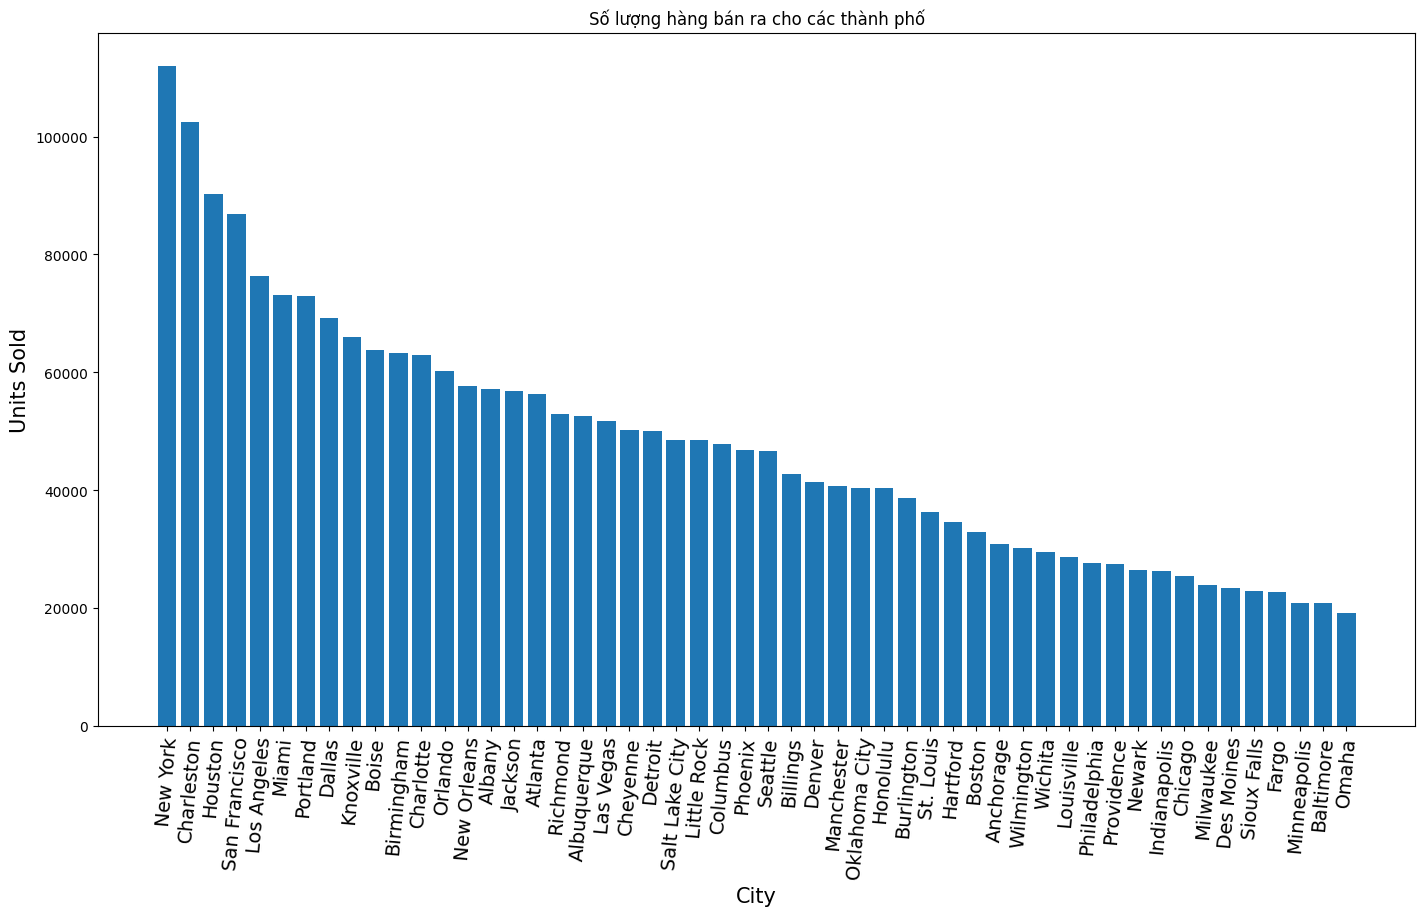

In [ ]:
plt.figure(figsize=(17, 9))
plt.bar(x=thanh_pho, height=top_city)
plt.xticks(thanh_pho, rotation=85, size=14)
plt.title('Số lượng hàng bán ra cho các thành phố')
plt.xlabel('City', fontsize=15)
plt.ylabel('Units Sold', fontsize=15)
plt.show()

**NHẬN XÉT**: Biều đồ thể hiện số lượng hàng được bán ra của các thành phố được sắp xếp theo thứ tự giảm dần.
*   Thành phố có số lượng hàng bán ra nhiều nhất là New York (111954)
*   Thành phố có số lượng hàng bán ra ít nhất là Omaha (19154)
*   Các thành phố còn lại được rãi đều từ 20000 đến 80000





**5.2. Biểu đồ thanh ngang**

**Năm nào có lợi nhuận lớn hơn ?**

In [ ]:
df["Invoice Date"] =pd.to_datetime(df["Invoice Date"])
df["Year"] = df["Invoice Date"].dt.year
df.Year =df.Year.astype("category")
#df.head()

In [ ]:
data = df[['Year','Operating Profit']].groupby('Year').sum()
data = data.sort_values(by='Operating Profit', ascending=False)
data

,Operating Profit
Year,
2021,38209462.62
2020,9015505.08


**Sản phẩm nào có giá trị trung bình tỷ lệ lợi nhuận lớn nhất ?**

In [ ]:
top_margin_products = df[['Product','Operating Margin']].groupby('Product').mean()
top_margin_products = top_margin_products.sort_values(by="Operating Margin", ascending=False)
top_margin_products

,Operating Margin
Product,
Men's Street Footwear,0.446130
Women's Apparel,0.441318
Women's Athletic Footwear,0.424359
Men's Apparel,0.413225
Women's Street Footwear,0.410199
Men's Athletic Footwear,0.402702


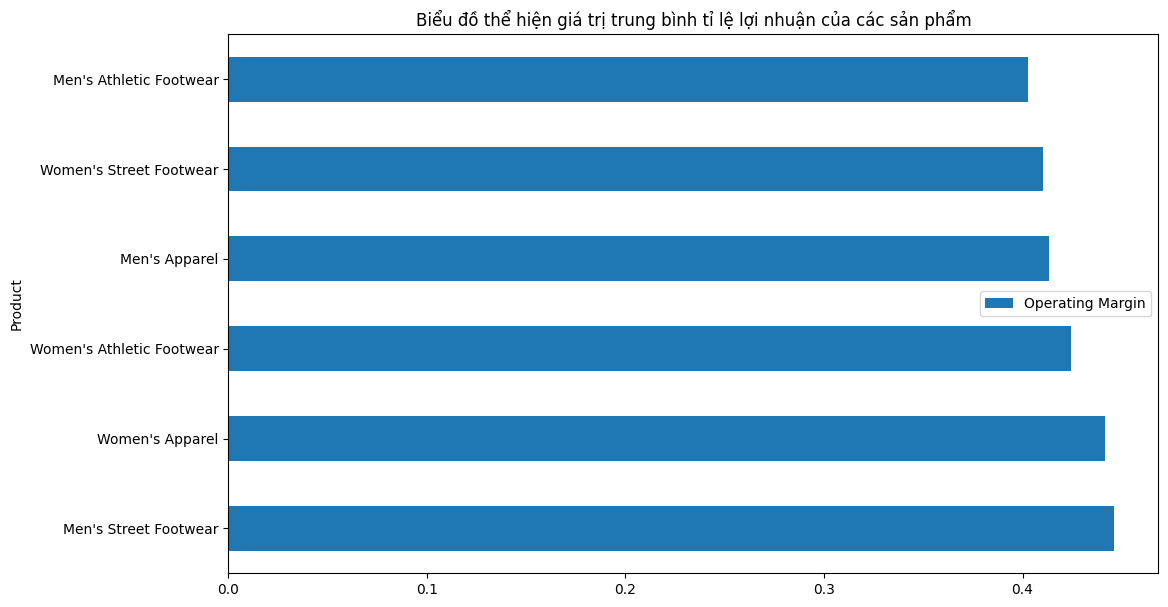

In [ ]:
top_margin_products.plot(kind='barh',figsize=(12,7),title='Biểu đồ thể hiện giá trị trung bình tỉ lệ lợi nhuận của các sản phẩm')
plt.show()

**NHẬN XÉT:**
*  Tất cả các sản phẩm đều có giá trị trung bình tỷ lệ lợi nhuận đều lớn hơn 0.4
*  Sản phẩm "Women's Street Footwear" có giá trung bình trị tỷ lệ lợi nhuận thấp nhất (0.410199)
*   Sản phẩm "Men's Street Footwear" có giá trung bình trị tỷ lệ lợi nhuận cao nhất (0.446130)
*   Hai sản phẩm "Giày đường phố nam" và "Trang phục của nữ" là hai sản phầm được người dùng ưa thích nhất





**Sản phẩm nào có lợi nhuận cao nhất ?**

In [ ]:
top_profit_products= df[['Product','Operating Profit']].groupby('Product').sum()
top_profit_products = top_profit_products.sort_values(by="Operating Profit", ascending=False)
top_profit_products

,Operating Profit
Product,
Men's Street Footwear,11629045.62
Women's Apparel,9685220.56
Men's Athletic Footwear,7437456.94
Women's Street Footwear,6494016.81
Men's Apparel,6381405.33
Women's Athletic Footwear,5597822.44


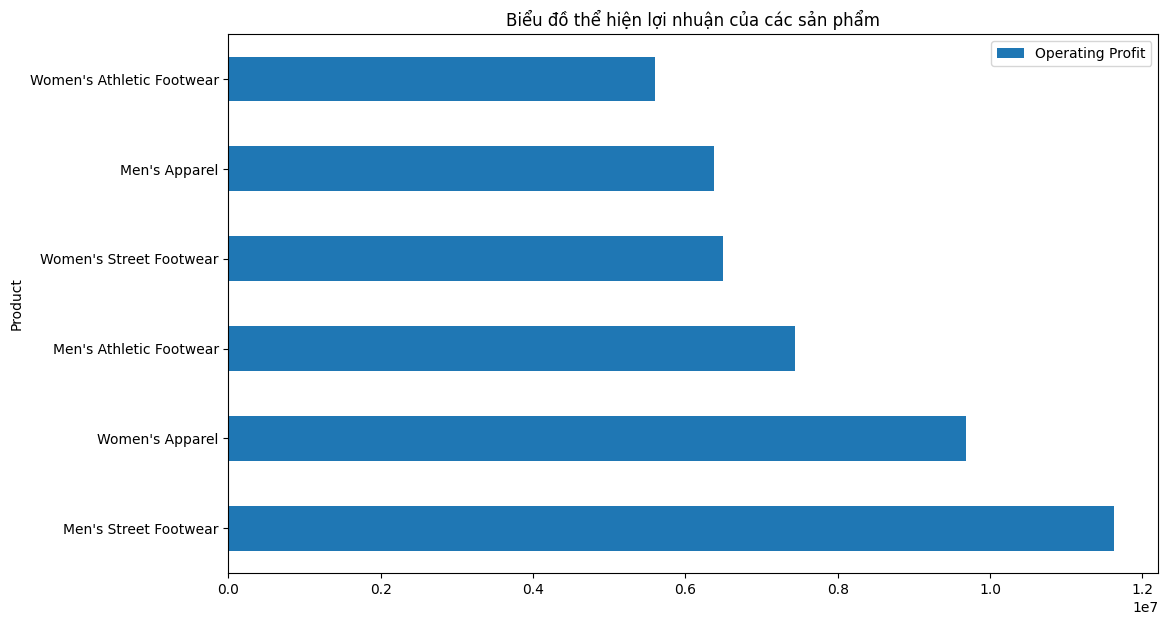

In [ ]:
top_profit_products.plot(kind='barh',figsize=(12,7),title='Biểu đồ thể hiện lợi nhuận của các sản phẩm')
plt.show()

**5.3. Biểu đồ tròn**

**Phương thức bán hàng nào được người dùng ưa chuộng nhất ?**

In [ ]:
top_sales_method= df[['Sales Method','Units Sold']].groupby('Sales Method').sum()
top_sales_method = top_sales_method.sort_values(by="Units Sold", ascending=False)
top_sales_method

,Units Sold
Sales Method,
Online,939093
Outlet,849778
In-store,689990


**Nhận xét**: Qua đó thì chúng ta nên đầu tư nguồn nhân lực, nguồn hàng cho phương thức bán hàng Online.

Sales Method
In-store    689990
Online      939093
Outlet      849778
Name: Units Sold, dtype: int64
Tổng số lượng hàng đã được bán ra là:  2478861
Phần trăm của mỗi cách thức bán hàng là:  Sales Method
In-store    27.834961
Online      37.884052
Outlet      34.280986
Name: Units Sold, dtype: float64


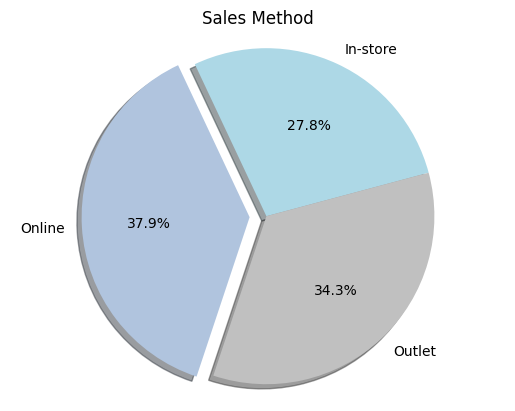

In [ ]:
grouped = df.groupby('Sales Method').sum()['Units Sold']
print(grouped)

tong_so = sum(df['Units Sold'])
print('Tổng số lượng hàng đã được bán ra là: ',tong_so)

tinh_phan_tram = (grouped / tong_so)*100
print('Phần trăm của mỗi phương thức bán hàng là: ',tinh_phan_tram)

my_labels = 'In-store','Online','Outlet'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
plt.pie(tinh_phan_tram,labels=my_labels,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors,explode=my_explode)
plt.title('Sales Method')
plt.axis('equal')
plt.show()

**NHẬN XÉT:**
*   Phương thức mua hàng online được người tiêu dùng chọn nhiều nhất (Với 37.9%)
*   Phương thức mua hàng in-store được người tiêu dùng chọn ít nhất (với 27.8%)
*   Phương thức mua hàng outlet đứng vị trí ở giữa (với 34.3%)

**=>** Xu hướng mua hàng online là sự ưu tiên trong thời buổi hiện nay. Không chỉ là các sản phẩm quần áo mà bất kì mặt hàng nào cũng có thể mua online tùy theo nhu cầu của người tiêu dùng. Cũng chính vì vậy mà kéo theo các ngành như logistic, quản lý chuỗi cung ứng, thương mai điện tử,...phát triển hơn. Tạo thêm công việc cho người lao động, các bạn sinh viên có thể làm người vận chuyển đơn hàng online.





**Nhà bán lẻ nào có tổng doanh thu lớn nhất và nhà bán lẻ nào có tổng doanh thu bé nhất?**

,Total Sales
Retailer,
Amazon,10096987
Foot Locker,29024945
Kohl's,13512453
Sports Direct,24616622
Walmart,10506085
West Gear,32409558


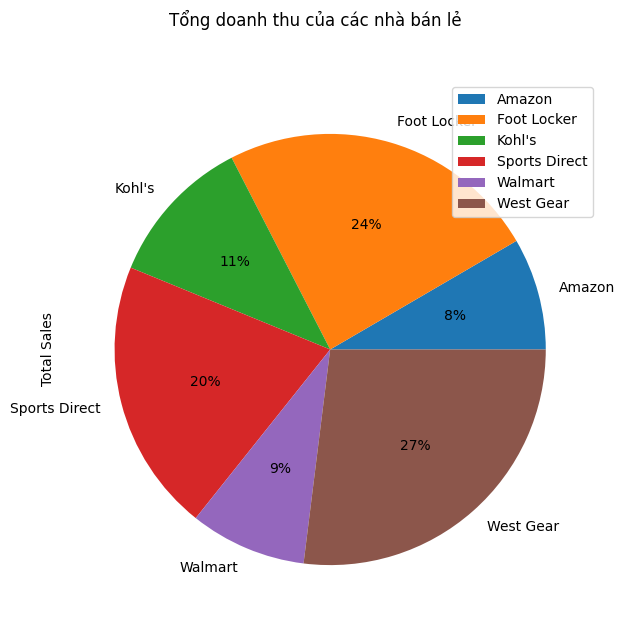

In [ ]:
top_retailers= df[['Retailer','Total Sales']].groupby('Retailer').sum()
top_retailers.plot(kind='pie',subplots=True,figsize=(12,7),title='Tổng doanh thu của các nhà bán lẻ',autopct='%1.0f%%')
top_retailers

**5.4. Biểu đồ đường**

**Tháng nào có tổng doanh thu lớn nhất và tháng nào có tổng doanh thu bé nhất của năm 2020 và năm 2021 ?**


In [ ]:
#df["Invoice Date"] =pd.to_datetime(df["Invoice Date"])
#df["Month"] = df["Invoice Date"].dt.month
#df.Month =df.Month.astype("category")
#df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,60000,30000.0,0.50,In-store,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,50000,15000.0,0.30,In-store,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,40000,14000.0,0.35,In-store,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,38250,13387.5,0.35,In-store,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,54000,16200.0,0.30,In-store,1


In [ ]:
doanh_thu = df[['Month','Total Sales']].groupby('Month').sum()
doanh_thu

,Total Sales
Month,
1,9744767
2,8263853
3,7694984
4,9691420
5,10741720
6,9803147
7,12550419
8,12293226
9,10405584


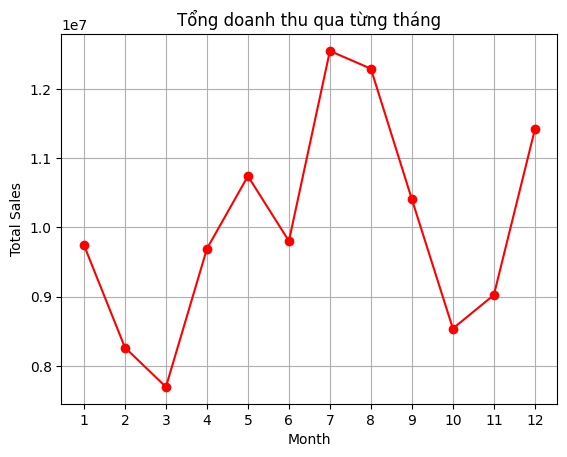

In [ ]:
month = range(1,13)
plt.plot(month, doanh_thu, color='red', marker='o')
plt.xticks(month)
plt.title('Tổng doanh thu qua từng tháng')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

**NHẬN XÉT:** Tổng doanh thu có sự biến động qua từng tháng
*   Tháng có doanh thu cao nhất là tháng 7 (12550419)
*   Tháng có doanh thu thấp nhất là tháng 3 (7694984)
*   Các sản phẩm được người dùng mua nhiều nhất trong khoảng thời gian từ tháng 5 đến tháng 9 tức mùa hè
*   Có 5 tháng (tháng 5,7,8,9,12) là có tổng doanh thu lớn hơn mức doanh thu trung bình (10013887.5)





**5.5. Biều đồ Boxplot**

**Tỷ lệ lợi nhuận phân tán như thế nào ?**

In [ ]:
data = df['Operating Margin']
bach_phan_vi = np.percentile(data, [25, 50, 75])
print(bach_phan_vi)
nho_nhat = data.min()
lon_nhat = data.max()
print('Giá trị nhỏ nhất là: ', nho_nhat)
print('Giá trị nhỏ nhất là: ', lon_nhat)

[0.35 0.41 0.49]
Giá trị nhỏ nhất là:  0.1
Giá trị nhỏ nhất là:  0.8


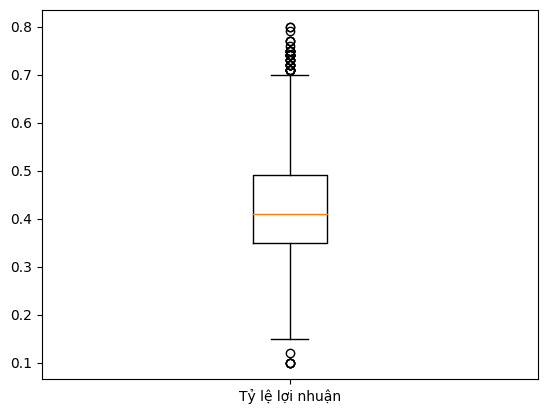

In [ ]:
plt.boxplot(data)
plt.xticks([1], ['Tỷ lệ lợi nhuận'])
plt.show()

**NHẬN XÉT:**
*   Giá trị nhỏ nhất trong cột "Operating Margin" là 0.1
*   Q1 = 0.35 => Có 25% giá trị tỷ lệ lợi nhuận dưới 0.35
*   Giá trị 0.41 chính là trung vị của cột "Operating Margin"
*   Q3 = 0.49 => Có 75% giá trị tỷ lệ lợi nhuận dưới 0.49
*   Giá trị lớn nhất trong cột "Operating Margin" là 0.8

=> Biểu đồ thể hiện tỷ lệ lợi nhuận khá cao, tỷ lệ lợi nhuận lớn hơn Q3 rất nhiều.


# **ƯỚC LƯỢNG KIỂM ĐỊNH**

**7.1. T test 1 mẫu (One sample t-test)**

**Bài toán: Giá trị trung bình của đơn giá sản phẩm có bằng 45$ hay không ?**

In [ ]:
tb = df['Price per Unit'].mean()
print('Giá trị trung bình của cột đơn giá sản phẩm là: ',tb)

Giá trị trung bình của cột đơn giá sản phẩm là:  45.21662520729685


**So sánh giá trị trung bình của cột đơn giá sản phẩm với một giá trị cụ thể**

In [ ]:
data = df['Price per Unit']
stats.ttest_1samp(a=data, popmean=45)

TtestResult(statistic=1.4469411952072373, pvalue=0.14794588559622035, df=9647)

**Nhận xét**: Bởi vì xác suất ý nghĩa của thử nghiệm của chúng ta là (0.14469) lớn hơn alpha = 0.05, chúng tha không thể bác bỏ giả thuyết giá trị trung bình của đơn giá sản phẩm là khác 45$. Tức không có đủ bằng chứng để nói rằng giá trị trung bình của đơn giá sản phẩm là khác 45 đô.

**7.2. Kiểm định t - hai mẫu (Two sapmle t test)**

**Bài toán: Chúng ta muốn biết giá trị trung bình lợi nhuận của các sản phẩm trong năm 2020 có bằng giá trị trung bình lợi nhuận của các sản phẩm trong năm 2021 hay không ?.**

In [ ]:
year = df[df['Year']==2020]
#year

In [ ]:
nam = df[df['Year']==2021]
#nam

In [ ]:
grouped_POP = year[['Product','Operating Profit']].groupby('Product').mean()
grouped_POP

,Operating Profit
Product,
Men's Apparel,6351.454259
Men's Athletic Footwear,6229.372269
Men's Street Footwear,9916.632146
Women's Apparel,7367.346895
Women's Athletic Footwear,5495.040139
Women's Street Footwear,6138.548472


In [ ]:
grouped_POM = nam[['Product','Operating Profit']].groupby('Product').mean()
grouped_POM

,Operating Profit
Product,
Men's Apparel,3603.950511
Men's Athletic Footwear,4370.095072
Men's Street Footwear,6798.923925
Women's Apparel,5811.210648
Women's Athletic Footwear,3173.304871
Women's Street Footwear,3712.708578


In [ ]:
stats.ttest_ind(a=grouped_POP, b=grouped_POM, equal_var=True)

TtestResult(statistic=array([2.68258848]), pvalue=array([0.02299034]), df=array([10.]))

**Nhận xét:**
Vì xác suất ý nghĩa của thử nghiệm của chúng ta (2.68258848) lớn hơn alpha = 0,05, chúng ta có thể bác bỏ giả thuyết vô hiệu của thử nghiệm. Tức có đủ bằng chứng để nói rằng giá trị trung bình lợi nhuận của các sản phẩm trong năm 2020 và giá trị trung bình lợi nhuận của các sản phẩm trong năm 2021 là khác nhau.


**7.3. T-Test các mẫu được ghép nối (Paired Samples T-Test)**

**Bài toán: Giá trị trung bình tổng doanh thu năm 2020 có bằng so với giá trị trung bình tổng doanh thu năm 2021 sau khi dịch Covid19 bùng phát mạnh mẽ hơn.**

In [ ]:
grouped_PT = year[['Product','Total Sales']].groupby('Product').mean()
grouped_PT

,Total Sales
Product,
Men's Apparel,16182.125000
Men's Athletic Footwear,19618.458333
Men's Street Footwear,22790.045662
Women's Apparel,21427.885845
Women's Athletic Footwear,14605.981481
Women's Street Footwear,16971.203704


In [ ]:
grouped_POT = nam[['Product','Total Sales']].groupby('Product').mean()
grouped_POT

,Total Sales
Product,
Men's Apparel,9370.714388
Men's Athletic Footwear,11721.372310
Men's Street Footwear,16311.825306
Women's Apparel,13807.255580
Women's Athletic Footwear,8029.229496
Women's Street Footwear,9723.982040


In [ ]:
stats.ttest_rel(grouped_PT, grouped_POT)

TtestResult(statistic=array([30.10042579]), pvalue=array([7.59134288e-07]), df=array([5]))

**Nhận xét**: Vì xác suất ý nghĩa (7.59134288e-07) nhỏ hơn 0,05, chúng ta bác bỏ giả thuyết không. Tức có đầy đủ bằng chứng để nói rằng giá trị trung bình tổng doanh thu năm 2020 và giá trị trung bình tổng doanh thu năm 2021 sau khi dịch Covid19 bùng phát mạnh hơn là khác nhau.


**7.4. Z-test một mẫu (one sample z-test)**

**Bài toán: Vào năm 2021, dịch Covid19 bùng phát mạnh hơn và chúng ta muốn biết sự ảnh hưởng của nó đến giá trị tỷ lệ lợi nhuận như thế nào?**

In [ ]:
data = nam[['Operating Margin']]
mean = np.median(data)
print('Giá trị trung bình của tỷ lệ lợi nhuận là: ' ,mean)

Giá trị trung bình của tỷ lệ lợi nhuận là:  0.41


In [ ]:
data = nam[['Operating Margin']]
data

ztest(data, value=0.41)

(array([15.47110079]), array([5.43693185e-54]))

**Nhận xét**: Vì giá trị p này nhỏ hơn 0,05, chúng ta có đủ bằng chứng để bác
bỏ giả thuyết rỗng. Nói cách khác, dịch Covid19 ảnh hưởng rất lớn đến tỷ lệ lợi nhuận.

# **TƯƠNG QUAN VÀ HỒI QUY**

**9.1. Hệ số tương quan**

**Mối tương quan giữa số lượng hàng bán ra trong 1 ngày và tổng doanh thu**

In [ ]:
var1 = df['Price per Unit']
var2 = df['Total Sales']
np.corrcoef(var1, var2)

array([[1.        , 0.53954668],
       [0.53954668, 1.        ]])

Hệ số tương quan của bài toán ở trên là r = 0.53954668
mà r nằm trong khoảng từ 0.5 đến +-1 nên là tương quan mạnh.

**9.2. Tương quan bộ phận**

In [ ]:
data = {'Price per Unit': df['Price per Unit'],
        'Units Sold':  df['Units Sold'],
        'Operating Profit': df['Operating Profit']
}

df = pd.DataFrame(data,columns=['Price per Unit','Units Sold','Operating Profit'])
df

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price per Unit,Units Sold,Operating Profit
Price per Unit,1.000000,0.265869,0.503683
Units Sold,0.265869,1.000000,0.871993
Operating Profit,0.503683,0.871993,1.000000


**9.3. Ma trận hiệp phương sai**

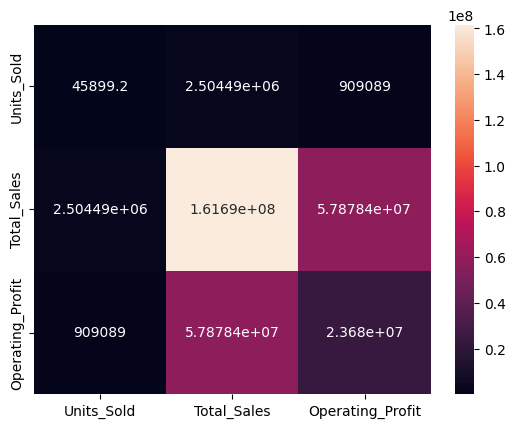

In [ ]:
import seaborn as sns
Units_Sold = df['Units Sold']
Total_Sales = df['Total Sales']
Operating_Profit = df['Operating Profit']
data = np.array([Units_Sold, Total_Sales, Operating_Profit])

cov = np.cov(data, bias=True)
labs = ['Units_Sold', 'Total_Sales', 'Operating_Profit']
sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

Hệ số hồi quy (slope): [54.60795536]
Hệ số giao nhau (intercept): [-3735.61441556]


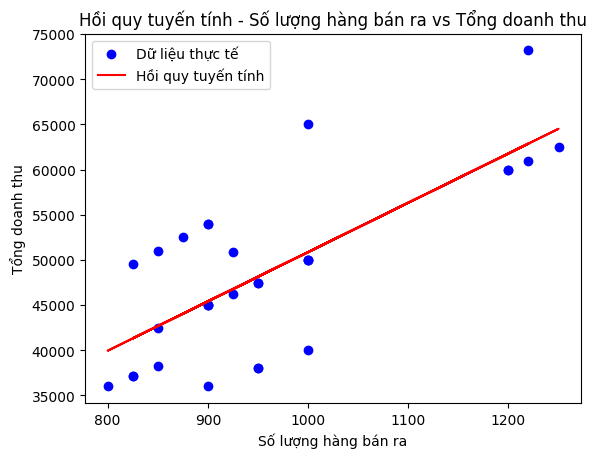

In [ ]:
# biến độc lập và biến phụ thuộc
X = df[['Units Sold']].head(30)
y = df[['Total Sales']].head(30)

# mô hình hồi quy tuyến tính
model = LinearRegression()
# huấn luyện mô hình
model.fit(X, y)

# Hệ số hồi quy
slope = model.coef_[0]
# hệ số giao nhau
intercept = model.intercept_

print(f"Hệ số hồi quy (slope): {slope}")
print(f"Hệ số giao nhau (intercept): {intercept}")

# Dự đoán doanh thu dựa trên số lượng hàng bán ra
y_pred = model.predict(X)

# Vẽ biểu đồ
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')
plt.plot(X, y_pred, color='red', label='Hồi quy tuyến tính')
plt.xlabel('Số lượng hàng bán ra')
plt.ylabel('Tổng doanh thu')
plt.title('Hồi quy tuyến tính - Số lượng hàng bán ra vs Tổng doanh thu')
plt.legend()
plt.show()
